# Heart-Disease-Classification: Supervised Machine Learning Project

## Project Objective: 
* Project Description: Given clinical parameters about a patient, can we predict whether or not the patient has heart-disease?
* Project Goals: We will build a model and if our model has reached 95% accuracy then we will pursue the project.

## Getting project tools ready

In [1]:
# Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Represents the plots inside the notebook
%matplotlib inline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Importing data

* Load Data into Jupyter Notebook using Panda's dataframe

In [2]:
# import data into panda's Dataframe from a csv file
from pathlib import Path

data_dir = Path("../../data/")
df = pd.read_csv(data_dir / "heart-disease.csv")
df.shape  # .shape displays total rows and columns

(303, 14)

## Performing Data Exploration through Exploratory Data Analysis or EDA

* Gaining Insights on data by performing EDA or Exploratory Data Analysis techniques: 

In [3]:
# .head by default displays the top 5 rows of heart-disease dataframe
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Viewing a quick insight into the total missing values and data types of our heart-disease dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Target is the column that we have to predict which has either 1 or 0 value, which refers to us as whether the person has heart disease or not: 
* 1 refers to True: Person has heart disease
* 0 refers to False: Person does not have heart disease

In [5]:
target_count = df.target.value_counts()

* 165 values indicate that person has heart disease
* 138 values indicate the person does not have heart disease


In [6]:
# Viewing normalized value counts
df.target.value_counts(normalize=True)

target
1    0.544554
0    0.455446
Name: proportion, dtype: float64

<Axes: xlabel='target'>

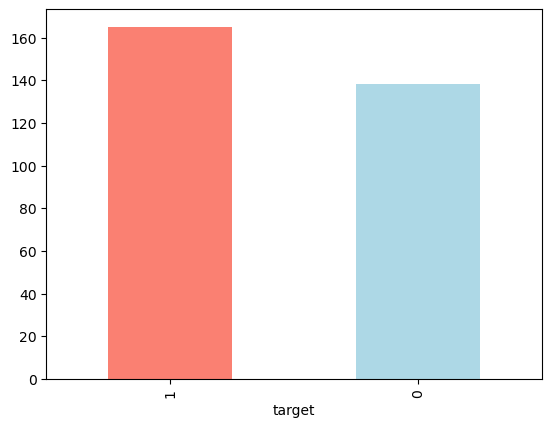

In [7]:
# Plotting the value counts using bar graph
target_count.plot(kind="bar",color=["Salmon","Lightblue"])

`df.describe()` Provides statistical insights on data i.e the mean, max and standard deviation of the data.

In [8]:
# another way to view insights on our data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Comparing two columns: *"age"* and *"target"* to understand the relationship between them

In [9]:
pd.crosstab(df.age, df.target)

target,0,1
age,,
29,0,1
34,0,2
35,2,2
37,0,2
38,1,2
39,1,3
40,2,1
41,1,9
42,1,7


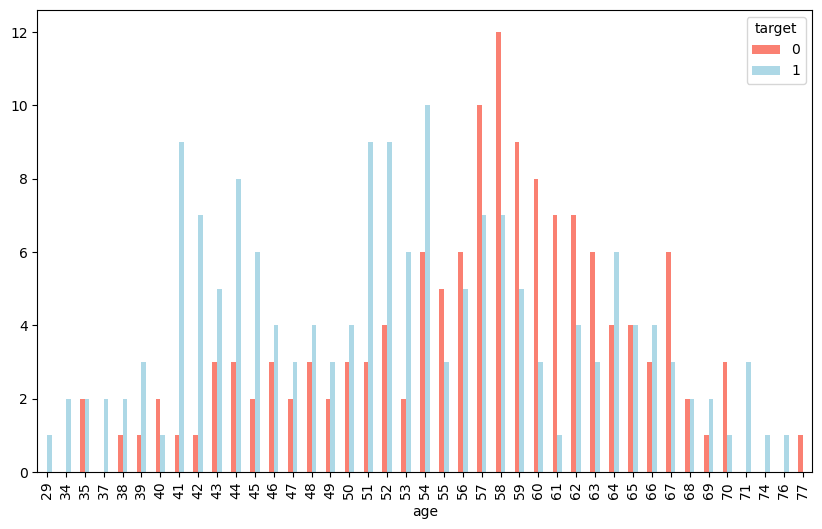

In [10]:
# plotting a graph to view meaningful insights on the relationship between age and target column
relation_1 = pd.crosstab(df.age, df.target).plot(kind="bar", 
                                               figsize=(10,6), 
                                               color=["salmon","lightblue"])

* With the help of data-visualization technique we will find out at what age there are maximum occurence of patients identified with positive heart-disease

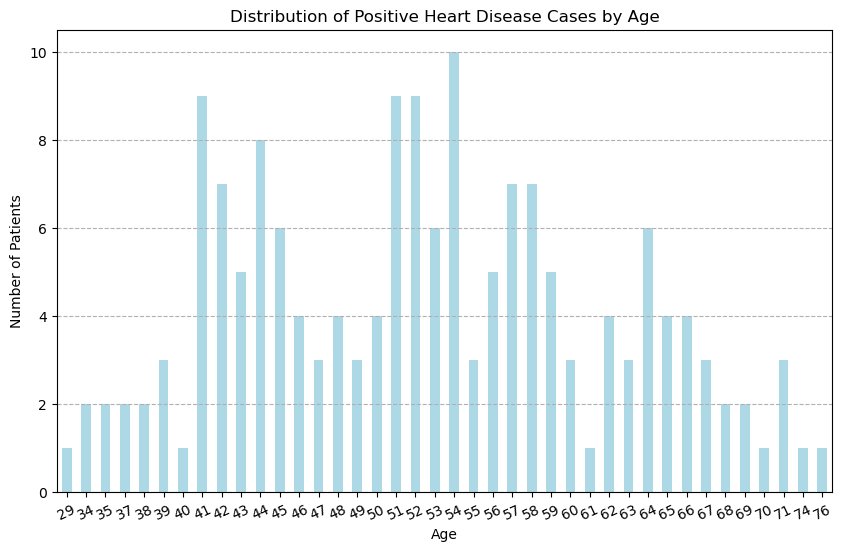

In [11]:
# Filter the dataset to include only positive heart disease cases
positive_cases = df[df['target'] == 1]

# Group the data by age and count the occurrences
age_counts = positive_cases['age'].value_counts().sort_index()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar', color='lightblue')
plt.title('Distribution of Positive Heart Disease Cases by Age')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.xticks(rotation=25)
plt.grid(axis='y', linestyle='--')
plt.show()

Results: At age 54 highest number of patients have been identified with the positve heart-disease cases. Also at early age between 29 to 40, the number of positive identified cases are less. 

Also visualizing the relationship between two different sex group male and female with the target columnm

In [12]:
relation_2 = pd.crosstab(df.target, df.sex)
relation_2

sex,0,1
target,,
0,24,114
1,72,93


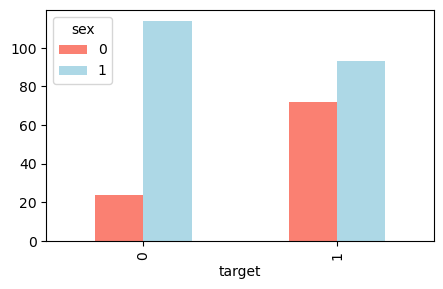

In [13]:
# plotting a graph
relation_2.plot(kind="bar", 
                figsize=(5,3),
                color=["salmon", "lightblue"]);


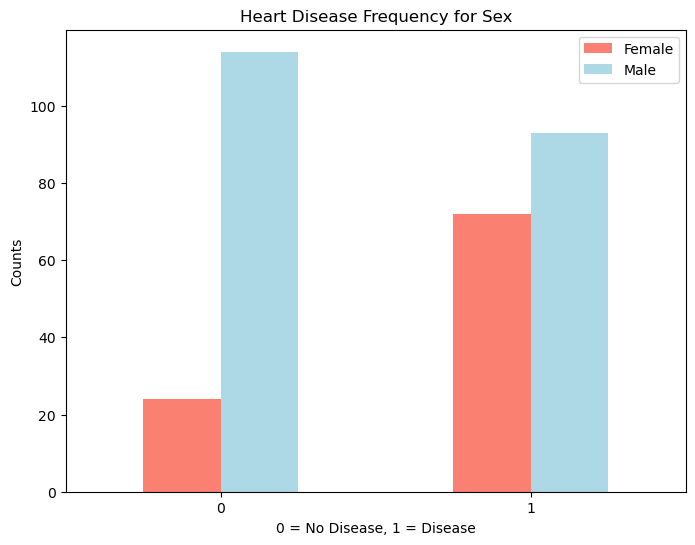

In [14]:
# Adding more details to the graph for better storytelling of the data: 

relation_2.plot(kind="bar", 
                figsize=(8,6),
                color=["salmon", "lightblue"]);

# adding details to the plot
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Counts")
plt.legend(["Female","Male"])
plt.xticks(rotation=0); 
plt.show()

## Understanding correlation matrix to find correlation between the independent variables

In [15]:
# using df.corr() we will create correlation matrix
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

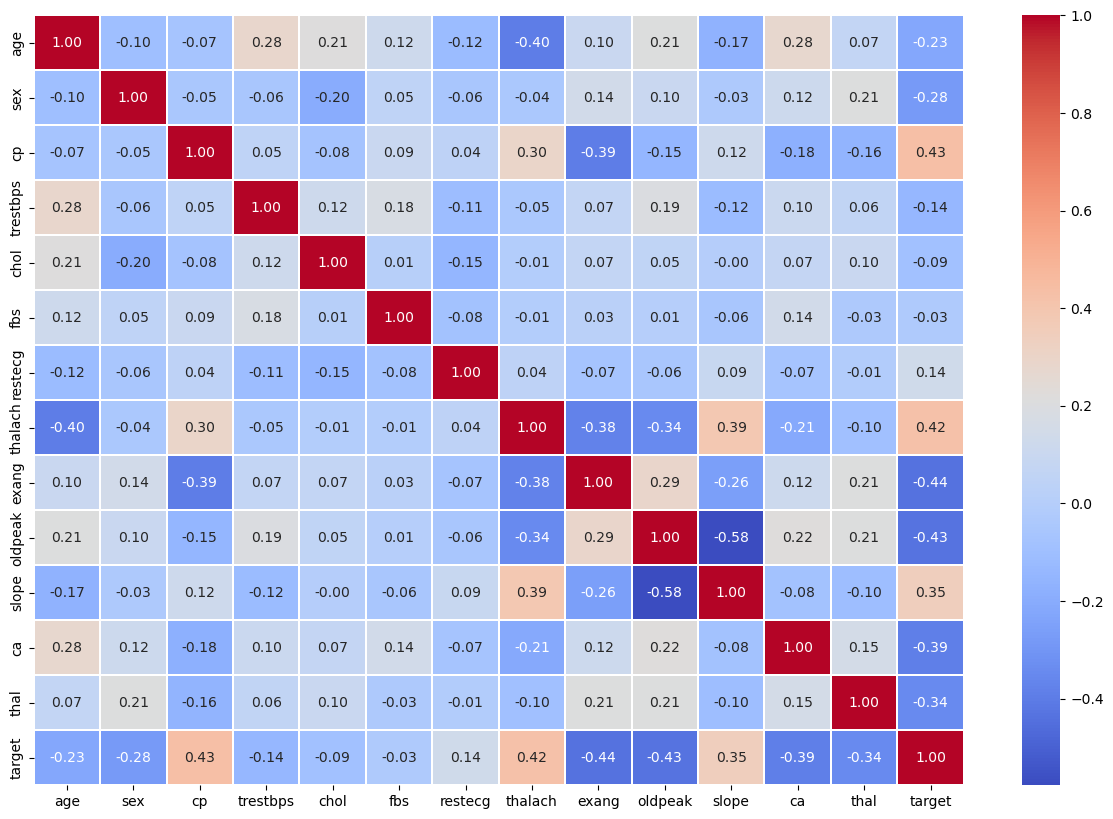

In [16]:
# better way to visualize a correlation matrix using seaborn library
corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f", 
            linewidths=0.2)

* In correlation matrix, a higher positive value means a potential positive correlation (increase) and a higher negative value means a potential negative correlation (decrease).

> We did a lot of EDA to gain better insights on the data we have, now lets understand how to do EDA in real-life project scenario. 
We will now learn how to perform model-driven EDA

## Splitting our data into X(features) and y(target vector or dependent variable)

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
# Features X
X = df.drop("target", axis=1)

# Target vector - y
y = df.target.values

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


## Dividing data into training and testing set using train_test_split module

In [20]:
# Random seed for reproducibility
np.random.seed(42)

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

* **Note** : `test_size=0.2` refers to as, 80% goes into training set and 20% data goes into testing set.

In [21]:
X.shape

(303, 13)

In [22]:
X_train.shape

(242, 13)

In [23]:
X_test.shape

(61, 13)

## Model Selection:

Since, we are working on the classification problem so based on [The Scikit-learn Algorithm Cheat Sheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) we will select the following three models:

1. LogisticRegression - `LogisticRegression()`
2. K-Nearest Neighbors - `KNeighborsClassifier()`
3. Random Forest - `RandomForestClassifier()`

* The reason why we selected the following 3 models is because:
  1. Why Logistic Regression? -
  2. Why K-Nearest Neighbors? -
  3. Why Random Forest? -

* **Note**: Since all the scikit-learn model uses the same functions for training and testing of the data we will put all our models into the dictionary.

In [24]:
# put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier()}

# Creating a function to fit and score our model
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # initiating a list to store model score
    model_scores = {}
    # looping through the models
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train,y_train)
        # evaluate the model and append its score to model scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [25]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

C:\Users\neerp\anaconda3\envs\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

## Plotting the model for visualizing the accuracy

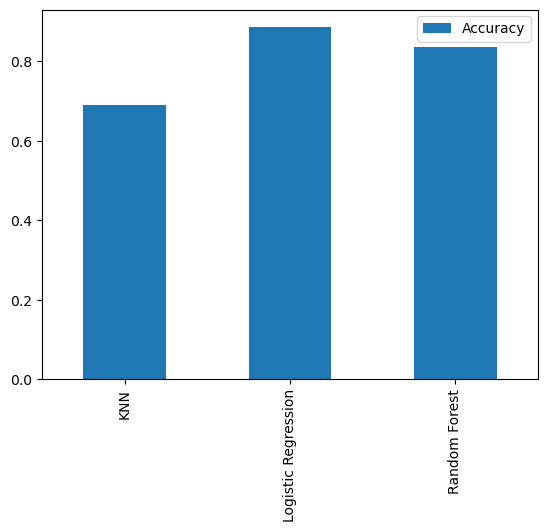

In [26]:
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
model_compare.T.plot.bar();

* In order to improve the accuracy of the models, we will evaluate our models and optimize them for improving their accuracy.

## Model Evaluation and Optimization

Few of the essential concepts to understand for model evaluation and optimization in machine learning are:

1. **Hyperparameter Tuning**: Adjusting the configurable parameters of a model to optimize its performance.
2. **Feature Importance**: Identifying which features have the most significant impact on the model's predictions.
3. **Confusion Matrix**: A table used to evaluate the performance of a classification model, comparing predicted labels with actual labels.
4. **Cross-Validation**: A technique for assessing how well a model will generalize to an independent dataset by partitioning the data into subsets for training and testing.
5. **Precision**: The proportion of true positive predictions out of all positive predictions made by the model.
6. **Recall**: The proportion of true positive predictions out of all actual positive instances in the dataset.
7. **F1 Score**: A harmonic mean of precision and recall, providing a single metric to evaluate a model's performance.
8. **Classification Report**: A summary of the key classification metrics including precision, recall, and F1 score, often generated by libraries like scikit-learn.
9. **ROC Curve (Receiver Operating Characteristic)**: A graphical plot that illustrates the trade-off between true positive rate and false positive rate across different threshold values.
10. **Area Under Curve (AUC)**: The measure of the area under the ROC curve, indicating the model's ability to distinguish between positive and negative classes. A score of 1.0 represents a perfect model.

## HyperParameter Tuning and Cross Validation

**Approach** : 
* Tune models hyperparameters
* Perform cross validation
* Plot Roc Curves
* Make a Confusion Matrix
* Get precision, recall and f1 score metrics
* Find most important models features

## Lets tune KNN: KNeighborsClassifier

* **Note**: One of the main hyperparameter through which we can tune KNN algorithm is the number of neighbors. By default it is set to 5 (n_neighbors=5)

In [27]:
# create a list of train scores
train_scores = []

# create a list of test scores
test_scores = []

# creating a list of values for n_neighbors between 1 to 21
neighbors = range(1, 21)

# Our KNN model to tune
knn = KNeighborsClassifier()

# lets loop the model through various parameter values
for i in neighbors:
    knn.set_params(n_neighbors=i) #setting the parameter value

    # fit the model to the data
    knn.fit(X_train,y_train)

    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

In [28]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

Maximum KNN score on the test data: 75.41%


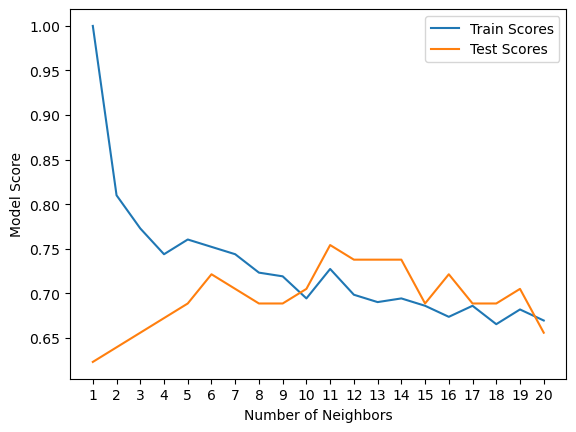

In [29]:
# plotting the scores

plt.plot(neighbors, train_scores, label="Train Scores")
plt.plot(neighbors, test_scores, label="Test Scores")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

When we analyze the graph the `n_neighbors` = 11 seems the best.

The `KNN's` model performance didn't get near what `LogisticRegression` or the `RandomForestClassifier` did. So, we would continue with our other models and drop `KNN`.   

We've tuned `KNN` by hand but let's see how we can tune `LogisticRegression` and `RandomForestClassifier` using `RandomizedSearchCV`.

## Tuning Models with Randomized Search CV

* There are more than one hyperparameters we can tune so we will use a `hyperparameter grid` (a dictionary of hyperparameters) for each and test them. 

In [30]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

* let's use `RandomizedSearchCV` to try and tune our `LogisticRegression` model.
* Let'sll pass it the different hyperparameters fro`m log_reg_gr`id as well as se`t n_iter = `20. This mesns`, RandomizedSearch`CV will try 20 different combinations of hyperparameters fro`m log_reg_gr`id and save the best ones.

In [31]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [32]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [33]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

* Now we've tuned `LogisticRegression` using `RandomizedSearchCV`, we'll do the same for `RandomForestClassifier`.

In [34]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [35]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [36]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

0.8688524590163934

* We saw a slight performance boost in both the `RandomForestClassifier` and `LogisticRegression` by tuning the hyperparameters for each models. As an outcome, `LogisticRegression` model is performing better we will continue to tune it further.

## Tuning our model with `GridSearchCV`

**Note**: The difference between RandomizedSearchCV and GridSearchCV is where RandomizedSearchCV searches over a grid of hyperparameters performing n_iter combinations, GridSearchCV will test every single possible combination.best.

In short:

* RandomizedSearchCV - tries n_iter combinations of hyperparameters and saves the best.
* GridSearchCV - tries every single combination of hyperparameters and saves the best.

In [37]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [38]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [39]:
# Evaluate the model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

**Outcomes**: In this case, we get the same results as before since our grid only has a maximum of 20 different hyperparameter combinations.m.

**Note**: If there are a large amount of hyperparameters combinations in your grid, GridSearchCV may take a long time to try them all out. This is why it's a good idea to start with RandomizedSearchCV, try a certain amount of combinations and then use GridSearchCV to refine them.

## Evaluating a Classification Model beyond Accuracy
* So we will compute the following:
  
1. ROC and AUC score: `RocCurveDisplay()`
2. Confusion matrix: `confusion_matrix()`
3. Classification report: `classification_report()`
4. Precision: `precision_score`
5. Recall: `recall_score`
6. f1_score: `f1_score`

In [40]:
# Make preidctions on test data
y_preds = gs_log_reg.predict(X_test)

In [41]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [42]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

### ROC Curves and AUC Scores

`ROC Curves` is a way of understanding how your model is performing by comparing the true positive rate to the false positive rate.

`AUC Curves` helps us to understand the aggregate measure of performance, i.e. probability that the model ranks the true positive example more likely than the false positive example. 

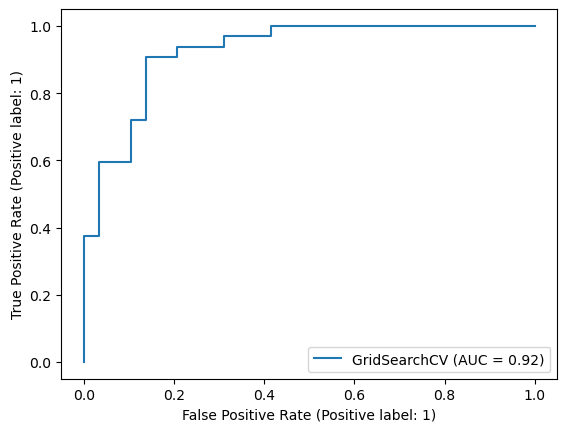

In [43]:
from sklearn.metrics import RocCurveDisplay 

# from_estimator() = use a model to plot ROC curve on data
RocCurveDisplay.from_estimator(estimator=gs_log_reg, 
                               X=X_test, 
                               y=y_test); 

This is great, our model does far better than guessing which would be a line going from the bottom left corner to the top right corner, `AUC = 0.5`. But a perfect model would achieve an `AUC score of 1.0`, so there's still room for improvement.

### Confusion Matrix

* A `confusion matrix` is a visual way to show where your model made the right predictions and where it made the wrong predictions (or in other words, got confused)
* Scikit-Learn allows us to create a confusion matrix using `confusion_matrix()` and passing it the true labels and predicted labels.

In [44]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


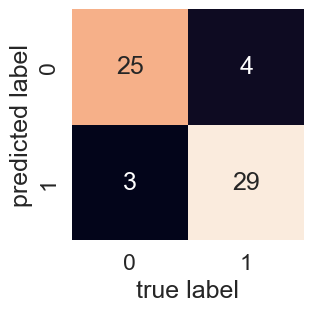

In [45]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

* You can see the model gets confused (predicts the wrong label) relatively the same across both classes. In essence, there are 4 occasaions where the model predicted 0 when it should've been 1 (false negative) and 3 occasions where the model predicted 1 instead of 0 (false positive).

### Classification Report

* We can make a classification report using `classification_report()` and passing it the true labels as well as our models predicted labels.

In [46]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



Now we have gained deeper insights on our model. But we obtained all the information using a single training and test set. 

We'll take the best model along with the best hyperparameters and use `cross_val_score()` along with various `scoring` parameter values.r.

`Cross_val_score()` works by taking an estimator (machine learning model) along with data and labels. It then evaluates the machine learning model on the data and labels using cross-validation and a defined scoring parameter.

In [47]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [48]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")


Now we've got an instantiated classifier, let's find some cross-validated metrics.

In [49]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

Since there are 5 metrics here, we'll take the average. 

In [50]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

Now we will do that same with the other classification metrics.

In [51]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.8215873015873015

In [52]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.9272727272727274

In [53]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.8705403543192143

Let's visualize the cross-validated metrics. 

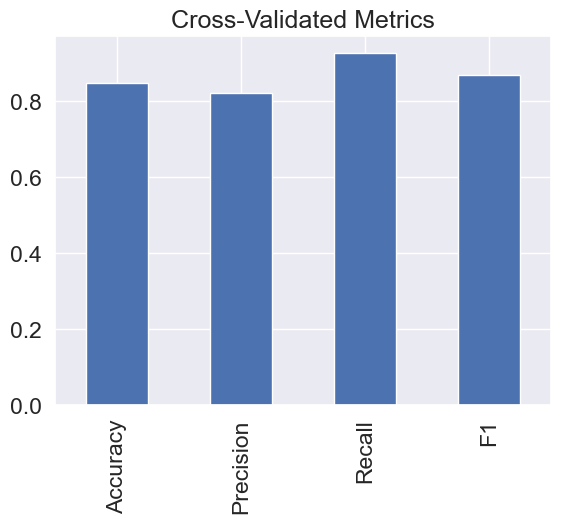

In [54]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

The above given visualization of our Cross-Validated Metrics, provides us with insights that can be communicated with the stakeholders, with ease. 

### Feature Importance

`Feature importance` is another way of asking, "which features contributing most to the outcomes of the model?"-

Since we're using `LogisticRegression`, we'll look at one way we can calculate feature importance for it.

To do so, we'll use th`e coe`f_ attribute. Looking at the Scikit-Learn documentation fo`r LogisticRegressi`on, th`e coe`f_ attribute is the coefficient of the features in the decision function.

We can access `the c`oef_ attribute after we've fit an instance` of LogisticRegres`sn.



In [55]:
# Fit an instance of LogisticRegression (taken from above)
clf.fit(X_train, y_train);

In [56]:
# Check coef_
clf.coef_

array([[ 0.00369922, -0.90424087,  0.67472828, -0.0116134 , -0.00170364,
         0.04787689,  0.33490186,  0.02472938, -0.63120403, -0.57590919,
         0.4709512 , -0.6516535 , -0.69984202]])

Looking at this it might not make much sense. But these values are how much each feature contributes to how a model makes a decision on whether patterns in a sample of patients health data leans more towards having heart disease or not.

Even knowing this, in it's current form, this coef_ array still doesn't mean much. But it will if we combine it with the columns (features) of our dataframe.

In [57]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.003699219011760782,
 'sex': -0.9042408714480176,
 'cp': 0.6747282766540338,
 'trestbps': -0.01161340334265323,
 'chol': -0.0017036446360052262,
 'fbs': 0.04787688669240361,
 'restecg': 0.3349018562558094,
 'thalach': 0.024729384743360134,
 'exang': -0.631204028843173,
 'oldpeak': -0.575909185434028,
 'slope': 0.47095119664446533,
 'ca': -0.6516535002884537,
 'thal': -0.6998420233395882}

Now we've match the feature coefficients to different features, let's visualize them.


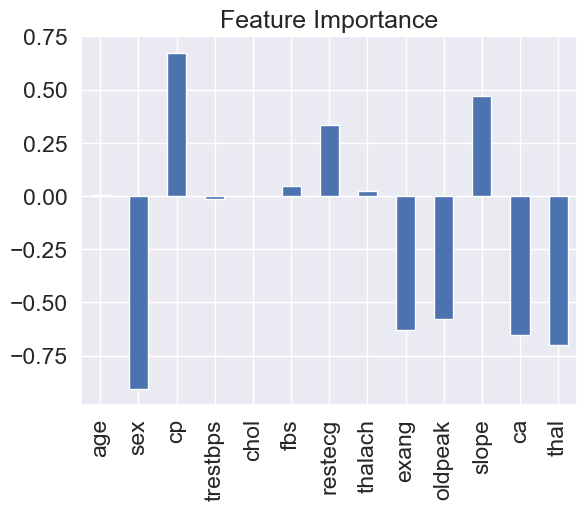

In [58]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

You'll notice some are negative and some are positive.

The larger the value (bigger bar), the more the feature contributes to the models decision.

If the value is negative, it means there's a negative correlation. And vice versa for positive values.

For example, the sex attribute has a negative value of -0.904, which means as the value for sex increases, the target value decreases.

We can see this by comparing the sex column to the target column.

In [59]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


You can see, when sex is 0 (female), there are almost 3 times as many (72 vs. 24) people with heart disease (target = 1) than without.

And then as sex increases to 1 (male), the ratio goes down to almost 1 to 1 (114 vs. 93) of people who have heart disease and who don't.

What does this mean?

It means the model has found a pattern which reflects the data. Looking at these figures and this specific dataset, it seems if the patient is female, they're more likely to have heart disease.

How about a positive correlation?

In [60]:
# Contrast slope (positive coefficient) with target
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - the slope of the peak exercise ST segment
* 0: Upslopping: better heart rate with exercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart

## End of Project:

The next step in our project is to discuss the work we have already did with our team and communicate the knowledge and insights we have gained so far, from the dataset. Throughout the entire project, what we did was `Experimenting` with our dataset and model. 

Let's revise the project goal:
* **Project Goal**: We will build a model and if our model has reached 95% accuracy then we will pursue the project.

So far, our project model have not reached the accuracy of 95%, the model with highest performance is `LogisticRegression` with accuracy of 88%

**Note**: Further down the road, what we can do is implement strategies to save time, since our biggest restriction working on project is time.b

If you haven't hit your evaluation metric yet... ask yourself...

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?